In [1]:
from MyEDFImports import load_all_data, load_all_labels, get_edf_filenames
from ssqueezepy import cwt, ssq_cwt
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = load_all_data()

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/WD224010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/TK221110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VP214110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:20: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LM230010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/VC209100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LA216100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DG220020.edf...
EDF file detected
Setting chann

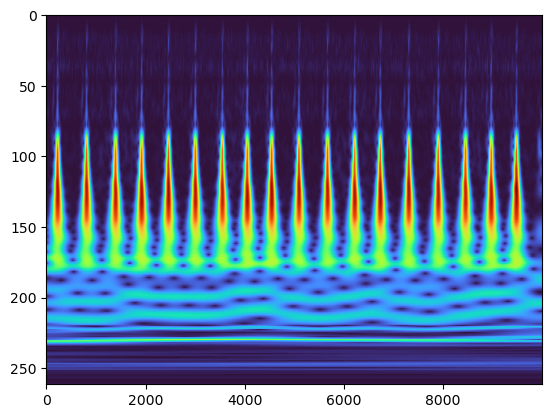

In [4]:
datapoint = data[3000]
coef, scales = cwt(datapoint,wavelet='morlet', scales=)
plt.imshow(np.abs(coef),aspect='auto', cmap='turbo')


In [62]:
scales

array([3.83041310e+00, 3.91428828e+00, 4.00000000e+00, 4.08758879e+00,
       4.17709494e+00, 4.26856184e+00, 4.36203098e+00, 4.45754719e+00,
       4.55515432e+00, 4.65489960e+00, 4.75682831e+00, 4.86098957e+00,
       4.96743107e+00, 5.07620382e+00, 5.18735838e+00, 5.30094671e+00,
       5.41702223e+00, 5.53563976e+00, 5.65685415e+00, 5.78072309e+00,
       5.90730476e+00, 6.03665781e+00, 6.16884327e+00, 6.30392361e+00,
       6.44196129e+00, 6.58302212e+00, 6.72717142e+00, 6.87447739e+00,
       7.02500868e+00, 7.17883635e+00, 7.33603239e+00, 7.49667072e+00,
       7.66082621e+00, 7.82857656e+00, 8.00000000e+00, 8.17517757e+00,
       8.35418987e+00, 8.53712368e+00, 8.72406197e+00, 8.91509438e+00,
       9.11030865e+00, 9.30979919e+00, 9.51365662e+00, 9.72197914e+00,
       9.93486214e+00, 1.01524076e+01, 1.03747168e+01, 1.06018934e+01,
       1.08340445e+01, 1.10712795e+01, 1.13137083e+01, 1.15614462e+01,
       1.18146095e+01, 1.20733156e+01, 1.23376865e+01, 1.26078472e+01,
      

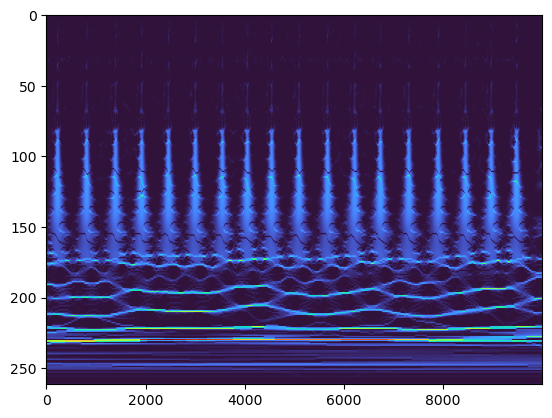

In [61]:
coef_ssq, w, *_ = ssq_cwt(datapoint, wavelet='morlet')
plt.imshow(np.abs(coef_ssq),aspect='auto', cmap='turbo')


In [ ]:
torch.from_numpy(np.abs(coef_ssq))

In [1]:
len(load_all_labels())

NameError: name 'load_all_labels' is not defined

In [27]:
import torchvision.transforms as T
import torch.nn.functional as F
transform = T.Resize(262)
resized = transform(torch.from_numpy(coef))
plt.imshow(np.abs(resized),aspect='auto', cmap='turbo')


/home/tadeusz/miniconda3/envs/tf/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [10000] and output size of [262, 10000]. Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [41]:
tensor_from_np = torch.from_numpy(np.abs(coef))
#plt.imshow(tensor_from_np,aspect='auto', cmap='turbo')
from PIL import Image
img = T.ToPILImage()(tensor_from_np)
img.show()

In [45]:
noise = torch.rand(3,300,700)
noise = tensor_from_np
to_im = T.ToPILImage()
img = to_im(noise)
img.show()

In [42]:
tensor_from_np.shape

torch.Size([262, 10000])

In [30]:
# why this doesn't work?
# T.Resize(size=262)(tensor_from_np)
F.interpolate(tensor_from_np, 262)

NotImplementedError: Input Error: Only 3D, 4D and 5D input Tensors supported (got 2D) for the modes: nearest | linear | bilinear | bicubic | trilinear | area | nearest-exact (got nearest)

/home/tadeusz/miniconda3/envs/tf/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


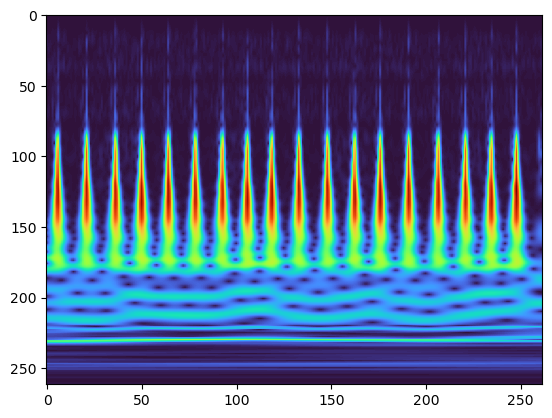

In [52]:
squeezed = T.Resize((262,262))(torch.reshape(tensor_from_np, (1,1,262,-1)))
squeezed = torch.squeeze(squeezed)
plt.imshow(squeezed,aspect='auto', cmap='turbo' )

In [63]:
squeezed.shape

torch.Size([262, 262])